   X   Y
0  1   4
1  2   6
2  3   9
3  4  11
4  5  18


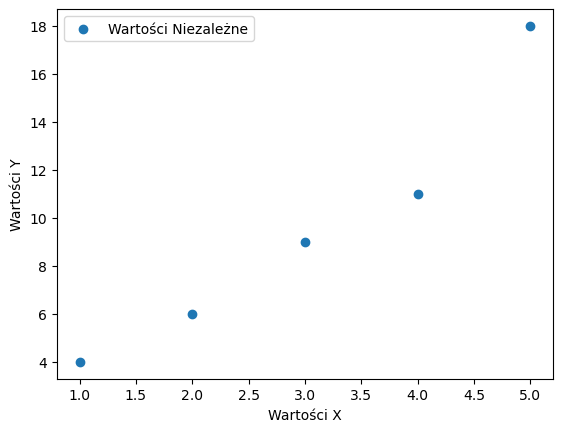

Mean x:  3.0
Mean y:  9.6

Standard deviation x:  1.5811388300841898
Standard deviation y:  5.412947441089743

Pearson n = 5
      X   Y   xy  x2   y2
0     1   4    4   1   16
1     2   6   12   4   36
2     3   9   27   9   81
3     4  11   44  16  121
4     5  18   90  25  324
sum  15  48  177  55  578

r =  0.963940292431027

y = -0.3000000000000007 * x - 3.3000000000000003


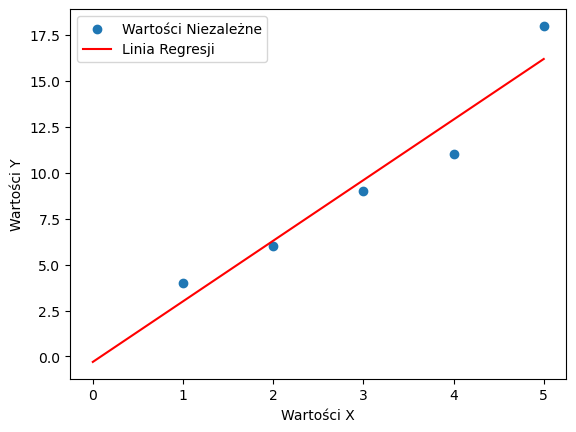

C:\Users\statk\AppData\Local\Temp\ipykernel_20176\1425170287.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'X': 6, 'Y': przewidywanie_wartosci_y(df, 6)}, ignore_index=True)
C:\Users\statk\AppData\Local\Temp\ipykernel_20176\1425170287.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'X': 7, 'Y': przewidywanie_wartosci_y(df, 7)}, ignore_index=True)
C:\Users\statk\AppData\Local\Temp\ipykernel_20176\1425170287.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'X': 8, 'Y': przewidywanie_wartosci_y(df, 8)}, ignore_index=True)


,X,Y
0,1.0,4.0
1,2.0,6.0
2,3.0,9.0
3,4.0,11.0
4,5.0,18.0
5,6.0,19.5
6,7.0,22.8
7,8.0,26.1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

def wartosci_niezalezne(df):
    print(df)
    plt.scatter(df['X'], df['Y'], label='Wartości Niezależne')
    plt.xlabel('Wartości X')
    plt.ylabel('Wartości Y')
    plt.legend()
    plt.show()
    
def srednia(df):
    Mx = sum(df['X'])/df['X'].shape[0]
    My = sum(df['Y']) /df ['Y'].shape[0]
    return Mx, My

def odchylenie(df):
    Mx = srednia(df)[0]
    My = srednia(df)[1]
    Sx = 0
    Sy = 0
    for i in range(0, df.shape[0]):
        Sx += (df['X'][i] - Mx)*(df['X'][i] - Mx)
        Sy += (df['Y'][i] - My)*(df['Y'][i] - My)
    Sx = Sx/(df.shape[0]-1)
    Sy = Sy/(df.shape[0]-1)
    Sx = sqrt(Sx)
    Sy = sqrt(Sy)
    return Sx, Sy

def wsp_korelacji_pearsona(df):
    pearson = pd.DataFrame(df[:])
    pearson['xy'] = df['X'] * df['Y']
    pearson['x2'] = df['X'] * df['X']
    pearson['y2'] = df['Y'] * df['Y']
    pearson.loc['sum'] = pearson.sum()
    r = (df.shape[0] * pearson.loc['sum', 'xy'] - pearson.loc['sum', 'X'] * pearson.loc['sum', 'Y'])/sqrt((df.shape[0] * pearson.loc['sum', 'x2'] - pearson.loc['sum', 'X'] * pearson.loc['sum', 'X']) * (df.shape[0] * pearson.loc['sum', 'y2'] - pearson.loc['sum', 'Y'] * pearson.loc['sum', 'Y']))
    return pearson, r
    
def linia_regresji(df):
    r = wsp_korelacji_pearsona(df)[1]
    Sx = odchylenie(df)[0]
    Sy = odchylenie(df)[1]
    Mx = srednia(df)[0]
    My = srednia(df)[1]
    
    b = r * Sy/Sx
    a = My - b * Mx
    
    print("y = "+str(a)+" * x - "+str(b))
    x = np.linspace(0, 5, 1000)
    plt.scatter(df['X'], df['Y'], label='Wartości Niezależne')
    plt.plot(x, b * x + a, 'r', label='Linia Regresji')
    plt.xlabel('Wartości X')
    plt.ylabel('Wartości Y')
    plt.legend()
    plt.show()
    
def przewidywanie_wartosci_y(df, x):
    r = wsp_korelacji_pearsona(df)[1]
    Sx = odchylenie(df)[0]
    Sy = odchylenie(df)[1]
    Mx = srednia(df)[0]
    My = srednia(df)[1]
    b = r * Sy/Sx
    a = My - b * Mx
    return b * x + a
        
df = pd.DataFrame()
df['X'] = [1, 2, 3, 4, 5]
df['Y'] = [4, 6, 9, 11, 18]
wartosci_niezalezne(df)
print("Mean x: ", srednia(df)[0])
print("Mean y: ", srednia(df)[1])
print()
print("Standard deviation x: ", odchylenie(df)[0])
print("Standard deviation y: ", odchylenie(df)[1])
print()
print("Pearson n = "+str(df.shape[0]))
print(wsp_korelacji_pearsona(df)[0])
print()
print("r = ", wsp_korelacji_pearsona(df)[1])
print()
linia_regresji(df)
df = df.append({'X': 6, 'Y': przewidywanie_wartosci_y(df, 6)}, ignore_index=True)
df = df.append({'X': 7, 'Y': przewidywanie_wartosci_y(df, 7)}, ignore_index=True)
df = df.append({'X': 8, 'Y': przewidywanie_wartosci_y(df, 8)}, ignore_index=True)
df